In [6]:
import pandas as pd

In [8]:
df_e = pd.read_csv('/content/drive/MyDrive/Hackathon/Train_Combined/train_combined_Species.csv')

In [9]:
df_e['label'].value_counts()

0    445
1    433
2     70
3     34
4     24
Name: label, dtype: int64

In [10]:
df_e['label'].dtypes

dtype('int64')

In [11]:
df_e['label'] = df_e['label'].astype('category')

In [95]:
df_e.drop('Unnamed: 0', axis = 1)

,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Peptococcales;Peptococcaceae;uncultured;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured Flavonifractor sp.,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-002;uncultured bacterium,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured bacterium.1,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;uncultured;uncultured organism,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Frisingicoccus;uncultured bacterium,...,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;[Eubacterium] ventriosum group;uncultured bacterium.45,Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;uncultured bacterium.372,Bacteria;Firmicutes;Clostridia;Clostridia UCG-014;uncultured bacterium.503,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Anaerosporobacter;uncultured bacterium.10,Bacteria;Actinobacteriota;Coriobacteriia;Coriobacteriales;Eggerthellaceae;Senegalimassilia;uncultured bacterium.75,Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;Colidextribacter;uncultured organism.14,Bacteria;Firmicutes;Bacilli;RF39;uncultured bacterium.269,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Roseburia;uncultured bacterium.166,Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;[Ruminococcus] gauvreauii group;uncultured bacterium.89,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


RANDOM FOREST

In [12]:
# cost sensitive random forest with custom class weightings
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [13]:
# load the dataset
def load_dataset(data):
 # split into input and output elements
 X, y = data.drop('label', axis=1), data['label']
  # retrieve numpy array
 X = X.values
 y = y.values
 
 # label encode the target variable
 y = LabelEncoder().fit_transform(y)
 return X, y

DATA PREPROCESSING

- Nomilize data

In [14]:
data_t, target = load_dataset(df_e)
# Normalize the data with MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_t)

- PCA

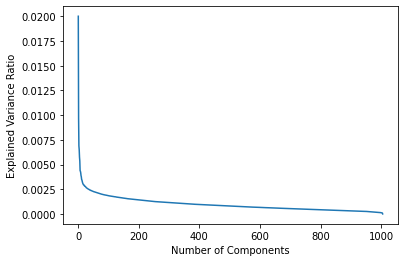

In [15]:
# Fit the PCA model to your data
pca = PCA()
pca.fit(data_normalized)

# Retrieve the explained variance ratio
evr = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(evr)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [16]:
# Apply PCA to reduce the dimensionality of the data
# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X)

# Transform the data
transformed_data = pca.transform(data_normalized)[:,:19]

In [17]:
transformed_data

array([[-1.73361270e-03, -1.35837130e-01, -4.61376180e-01, ...,
         1.78859520e-01,  1.35875586e-01, -6.15900347e-02],
       [-5.88302084e-02,  3.57058900e-01,  6.59720657e-01, ...,
        -3.71149113e-01, -6.13418218e-01,  2.01939498e+00],
       [-3.96243207e-02, -9.52518913e-02, -1.98964793e-01, ...,
         3.40322770e-02,  1.29995856e-01,  1.32983962e-01],
       ...,
       [-6.34481557e-03,  1.01107756e-01,  1.10193053e-01, ...,
        -2.16887876e-01, -3.57376440e-01, -3.13961484e-01],
       [-5.17943436e-02, -6.63909776e-02, -1.63293392e-01, ...,
        -2.88113313e-02, -7.21743056e-02,  3.45858407e-02],
       [-3.82075406e-02, -5.49368882e-02, -1.07832293e-01, ...,
         6.96112370e-02,  1.47775115e-02,  1.35226987e-01]])

SPLITTING

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_data, target, test_size=0.3, stratify=target, random_state=0)

In [20]:
import numpy as np

In [107]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

RF WITH GRIDSEARCH

In [108]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [109]:

# Define the pipeline with RandomOverSampler and RandomForestClassifier
pipeline = Pipeline([
    ('sampler', RandomOverSampler()),
    ('classifier', RandomForestClassifier())
])

In [110]:
# Train a Random Forest classifier using GridSearchCV for hyperparameter tuning
# params_grid = {'n_estimators': [100, 1000],
#               'max_depth': [None, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'criterion': ['gini', 'entropy']}
params_grid = {
    'classifier__n_estimators': [100,200, 300, 500],
    'classifier__max_depth': [None],
    'sampler__sampling_strategy': [{1: 415, 2: 415, 3: 415, 4: 415}]
}

In [111]:
#weights = {0:1.0, 1:1.0, 2:3.0, 3:4.0, 4:4.0}
# rf_clf = RandomForestClassifier(random_state=42)

In [112]:
grid_search = GridSearchCV(pipeline, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='balanced_accuracy')

In [113]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (415) in class 1 will be larger than the number of samples in the majority class (class #0 -> 311)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (415) in class 2 will be larger than the number of samples in the majority class (class #0 -> 311)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (415) in class 3 will be larger than the number of samples in the majority class (class #0 -> 311)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (415) in class 4 will be larger than the number of samples in the majority class (class #0 -> 311)
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampler', RandomOverSampler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None],
                         'classifier__n_estimators': [100, 200, 300, 500],
                         'sampler__sampling_strategy': [{1: 415, 2: 415, 3: 415,
                                                         4: 415}]},
             scoring='balanced_accuracy', verbose=1)

In [114]:
grid_search.best_score_

0.20178842134421196

RF WITH CROSS VALIDIERUNG

In [115]:
# evaluate a model
def evaluate_model(X, y, model):
 # define evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

In [116]:
# load the dataset
X, y = load_dataset(df_e)
# define the model
weights = {0:1.0, 1:1.0, 2:3.0, 3:4.0, 4:4.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

KeyboardInterrupt: ignored

In [ ]:
df_e.values